In [1]:
import numpy as np
from PIL import Image
np.set_printoptions(threshold=np.nan)
import matplotlib.pyplot as plt



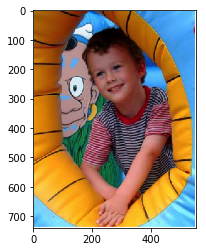

(5, 409960)

In [9]:
image = Image.open('Images/Image1.png')
X = np.array(image)
X = X/255
imgplot = plt.imshow(X)
plt.show()
X = X.reshape(X.shape[0]*X.shape[1],4)
X = X.transpose()
labels = np.zeros((1,X.shape[1]))
X = np.append(X,labels,axis = 0)

# <center>Visualizing data</center>

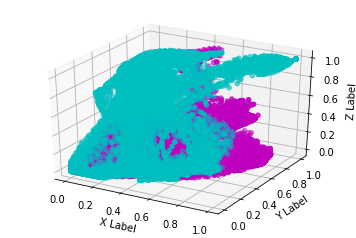

In [3]:
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

xs = np.real(X[0,0:50000])
ys = np.real(X[1,0:50000])
zs = np.real(X[2,0:50000])
xt = np.real(X[0,250000:300000])
yt = np.real(X[1,250000:300000])
zt = np.real(X[2,250000:300000])

ax.scatter(xs, ys,zs , c='c', marker='o')
ax.scatter(xt, yt,zt , c='m', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

# <center>Compute initial centroids</center>

In [4]:
def init_centroids(a,k):
    centroids = np.zeros((np.shape(a)[0],k))
    for i in range(0,k):
        num = np.random.randint(0,np.shape(a)[1])
        centroids[:,i] = a[:,num]
        centroids[4,i] = i
        a[4,num] = i
    return centroids

# <center>Computer new centroids</center>

In [5]:
def new_centroids(a,k):
    new_centroids = np.zeros((np.shape(a)[0],k))
    for i in range(0,k):
            new_centroids[:,i] = np.mean(a[:,a[4,:]==i],axis = 1)
    print(np.shape(new_centroids))
    return new_centroids

# <center>Compute distance to centroids & assign labels</center>

In [6]:
from scipy.spatial.distance import cdist as cd

def distance(a,centroids):
    index2 = np.shape(centroids)[1]
    temp = np.zeros((1,index2))
    print(np.shape(a))
    for i in range(0,np.shape(a)[1]):
        temp = cd([a[0:4,i].transpose()],centroids[0:4,:].transpose(),metric = 'euclidean')
        closest_centroid = np.argmin(temp)
        temp2 = centroids[:,closest_centroid]
        a[:,i] = temp2
    return a

In [7]:
num_centroids = 24
X_temp = np.zeros((5,409960))
centroids = init_centroids(X,num_centroids)
X_temp = distance(X,centroids)
for i in range(0,1):
    centroids_new = new_centroids(X_temp,num_centroids)
    centroids = centroids_new
    X_temp = distance(X_temp,centroids)
        

(5, 409960)
(5, 24)
(5, 409960)


/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel_launcher.py:11: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  # This is added back by InteractiveShellApp.init_path()


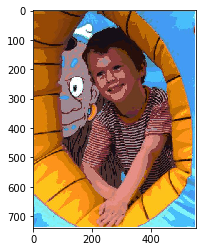

In [8]:
import scipy.misc

r = X_temp[0,:]
g = X_temp[1,:]
b = X_temp[2,:]
r = r.reshape(740,554)
g = g.reshape(740,554)
b = b.reshape(740,554)
rgb = np.dstack((r*255,g*255,b*255))

scipy.misc.imsave('rgb.jpg',rgb)
image = Image.open('rgb.jpg')
imgplot = plt.imshow(image)
plt.show()